# Example of interpolation on regular grid

## Field interpolation

In [1]:
from data_manip.extraction.telemac_file import TelemacFile
from data_manip.formats.regular_grid import interpolate_on_grid
from data_manip.formats.regular_grid import field_diff_on_grid

# Changing of directory : 'examples' directory of the Telemac sources
from os import environ, path
file_name = path.join(environ['HOMETEL'],
                      'notebooks',
                      'data',
                      'r2d_malpasset-char.slf')



# Initalisaing Telemac file reader
res = TelemacFile(file_name)

#Interpolation with regular grid creation
water_depth, grid = interpolate_on_grid(res.tri,
                                 res.get_data_value('WATER DEPTH', 11),
                                 grid_xlim=[4000,11000],
                                 grid_ylim=[1000,6000],
                                 grid_resolution=(500,500))
# res.get_data_value('Variable name', 'Frame number')
del res

## Field display 

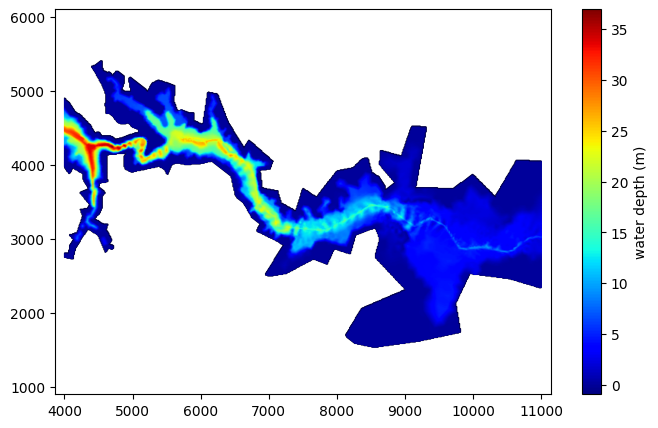

In [2]:
from os import environ, path
import matplotlib.pyplot as plt
from data_manip.extraction.telemac_file import TelemacFile
from data_manip.formats.regular_grid import interpolate_on_grid
from postel.plot2d import *

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

plot2d_scalar_map(fig, ax, grid, water_depth, data_name='water depth (m)')

plt.show()
plt.close(fig)

# Example of difference between two telemac results

## Fields interpolation 

In [3]:
from data_manip.extraction.telemac_file import TelemacFile
from data_manip.formats.regular_grid import interpolate_on_grid
from data_manip.formats.regular_grid import field_diff_on_grid

# Changing of directory : 'examples' directory of the Telemac sources
from os import environ, path
file_name1 = path.join(environ['HOMETEL'],
                      'notebooks',
                      'data',
                      'r2d_malpasset-char.slf')

# Initalisaing Telemac file reader
res1 = TelemacFile(file_name1)

#Interpolation with regular grid creation
data1, grid = interpolate_on_grid(res1.tri, 
                                  [res1.get_data_value('VELOCITY U', 11),
                                   res1.get_data_value('VELOCITY V', 11)],
                                  grid_xlim=[4000,11000],
                                  grid_ylim=[1000,6000],
                                  grid_resolution=(500,500))
# res.get_data_value('Variable name', 'Frame number')
del res1
file_name2 = path.join(environ['HOMETEL'],
                      'notebooks',
                      'data',
                      'r2d_malpasset-fine.slf')

res2 = TelemacFile(file_name2)
#Interpolation with existing regular grid 
data2, grid = interpolate_on_grid(res2.tri, 
                                  [res2.get_data_value('VELOCITY U', 0),
                                   res2.get_data_value('VELOCITY V', 0)],
                                  grid= grid)
del res2


## Fields difference


In [4]:
data_dif = field_diff_on_grid(data1,data2)

Note that data1 and data2 are on the same  grid.

## Fields  display 

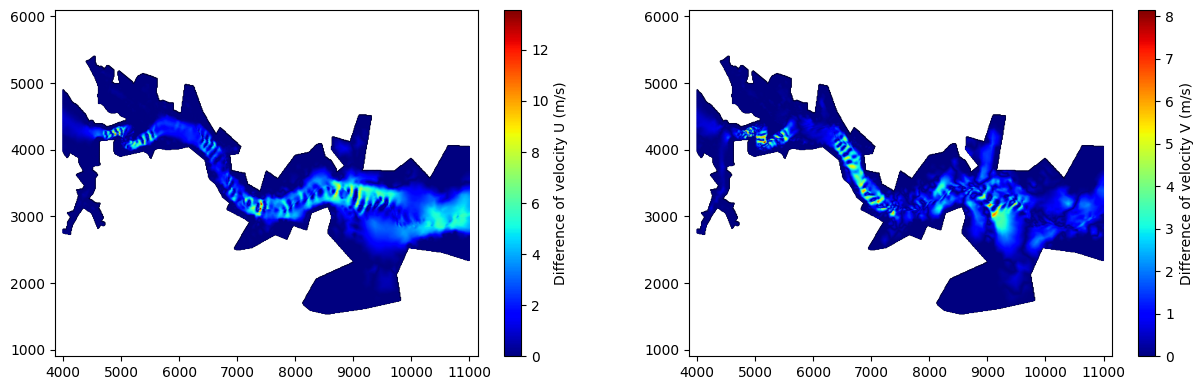

In [5]:
from os import environ, path
import matplotlib.pyplot as plt
from data_manip.extraction.telemac_file import TelemacFile
from data_manip.formats.regular_grid import interpolate_on_grid
from postel.plot2d import *

fig, ax = plt.subplots(ncols=2, figsize=(15, 4.5))

plot2d_scalar_map(fig, ax[0], grid, data_dif[0], data_name='Difference of velocity U (m/s)')
plot2d_scalar_map(fig, ax[1], grid, data_dif[1], data_name='Difference of velocity V (m/s)')

plt.show()
plt.close(fig)